In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import OrderedDict
from xgboost import XGBRegressor
import missingno as msno
from sklearn.model_selection import train_test_split




warnings.filterwarnings("ignore")

### Cargar los datos


In [200]:
import pandas as pd

train = pd.read_csv('C:\\Users\\torre\\OneDrive\\Desktop\\Proyecto ML\\Data\\train.csv')
test= pd.read_csv('C:\\Users\\torre\\OneDrive\\Desktop\\Proyecto ML\\Data\\test.csv')

### Conociendo la data

In [201]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [203]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [204]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Observamos que hay unos missing values y algunso datos en JSON.

Voy a corregir algunos datos erroneos en los dos datasets (Estos datos de correccion están en un foro)

In [205]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [206]:
#Para la data nominal intercamiamos los missing por none
train[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = train[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")

test[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = test[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")

En las columnas 'collection' y 'homepage' hay algunos valores nulos. Voy a poner algunos porcentajes para cubrir esos valores en ambos datasets.

In [207]:
((pd.DataFrame(train.isnull().sum()).T)/len(train))*100

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0.0,79.866667,0.0,0.0,68.466667,0.0,0.0,0.0,0.266667,0.0,...,0.0,0.066667,0.0,0.0,19.9,0.0,9.2,0.0,0.0,0.0


In [208]:
((pd.DataFrame(test.isnull().sum()).T)/len(test))*100

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,0.0,80.059118,0.0,0.0,67.712597,0.0,0.0,0.0,0.318327,0.0,...,0.0,0.022738,0.09095,0.0,0.0,19.622556,0.068213,8.93588,0.0,0.0


## EDA

Voy a investigar los valores de la columna 'budget' ya que no hay valores nulos pero no sé si son reales.

In [209]:
pd.DataFrame(train.budget.value_counts()).T

budget,0,15000000,25000000,40000000,20000000,5000000,30000000,10000000,12000000,50000000,...,3537415,878000,3250000,747000,1119000,65000,1750000,15000,13800000,1135654
count,796,73,71,71,69,68,66,55,53,50,...,1,1,1,1,1,1,1,1,1,1


Hay muchos valores 0, eso no está bien. Los voy a rellenar con la media

In [210]:
mean_budget = train[train['budget'] > 0]['budget'].mean()
print(mean_budget)

30845758.68693285


In [211]:
def fill_budget(df, mean_budget):
    df['budget_is_mean'] = 0
    df.loc[df.budget == 0, 'budget _is_mean'] = 1
    df.loc[df.budget == 0, 'budget'] = mean_budget
    return df


In [212]:
train = fill_budget(train, mean_budget)
test = fill_budget(test, mean_budget)

In [213]:
pd.DataFrame(train.budget.value_counts()).T

budget,3.084576e+07,1.500000e+07,2.500000e+07,4.000000e+07,2.000000e+07,5.000000e+06,3.000000e+07,1.000000e+07,1.200000e+07,5.000000e+07,...,3.537415e+06,8.780000e+05,3.250000e+06,7.470000e+05,1.119000e+06,6.500000e+04,1.750000e+06,1.500000e+04,1.380000e+07,1.135654e+06
count,796,73,71,71,69,68,66,55,53,50,...,1,1,1,1,1,1,1,1,1,1


In [214]:
train.describe()

,id,budget,popularity,runtime,revenue,budget_is_mean,budget _is_mean
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.0,796.0
mean,1500.500000,3.084576e+07,8.463274,107.856571,6.668176e+07,0.0,1.0
std,866.169729,3.443020e+07,12.104000,22.086434,1.375149e+08,0.0,0.0
min,1.000000,1.000000e+00,0.000001,0.000000,1.000000e+00,0.0,1.0
25%,750.750000,9.000000e+06,4.018053,94.000000,2.401550e+06,0.0,1.0
50%,1500.500000,3.000000e+07,7.374861,104.000000,1.680707e+07,0.0,1.0
75%,2250.250000,3.084576e+07,10.890983,118.000000,6.877599e+07,0.0,1.0
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,0.0,1.0


Voy a lidiar con las columnas de formato JONSON

In [215]:
# Pasar los formato JSON a nominales
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [216]:
# Este código transforma las columnas genres, spoken_languages, cast, y crew 
# Asegurando que los datos estén ordenados alfabéticamente y formateados como cadenas separadas por comas.

train.genres = train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.cast = train.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.crew = train.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

test.genres = test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.cast = test.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.crew = test.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

train.crew.head()

0    Adam Blum,Allison Gordin,Andrew Panay,Annabell...
1    Bruce Green,Charles Minsky,Debra Martin Chase,...
2    Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...
3                  Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh
4                        Jong-seok Yoon,Jong-seok Yoon
Name: crew, dtype: object

#### Visualizaciones

##### Presupuesto VS Ganancias

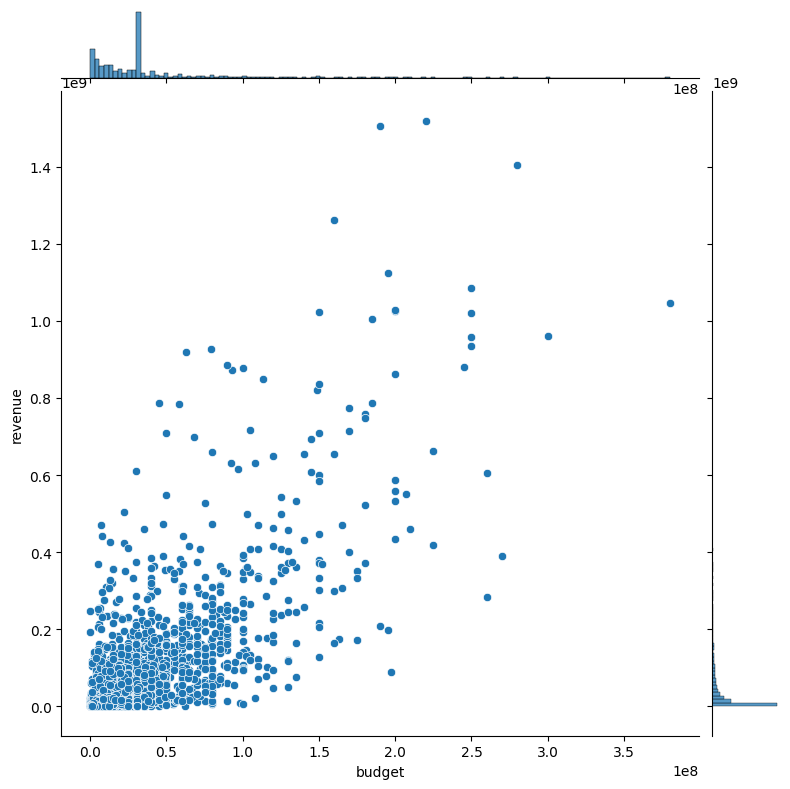

In [217]:
sns.jointplot(x="budget", y="revenue", data=train, height=8, ratio=8)
plt.show()

#### Popularidad VS Ganancias

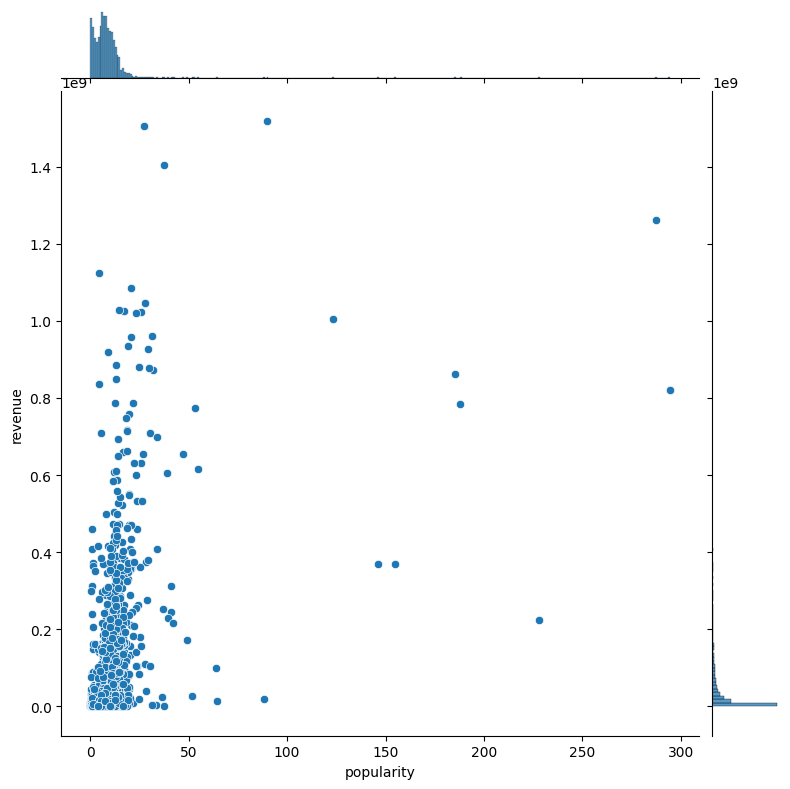

In [218]:
sns.jointplot(x="popularity", y="revenue", data=train, height=8, ratio=8)
plt.show()

#### Duración VS Ganancias

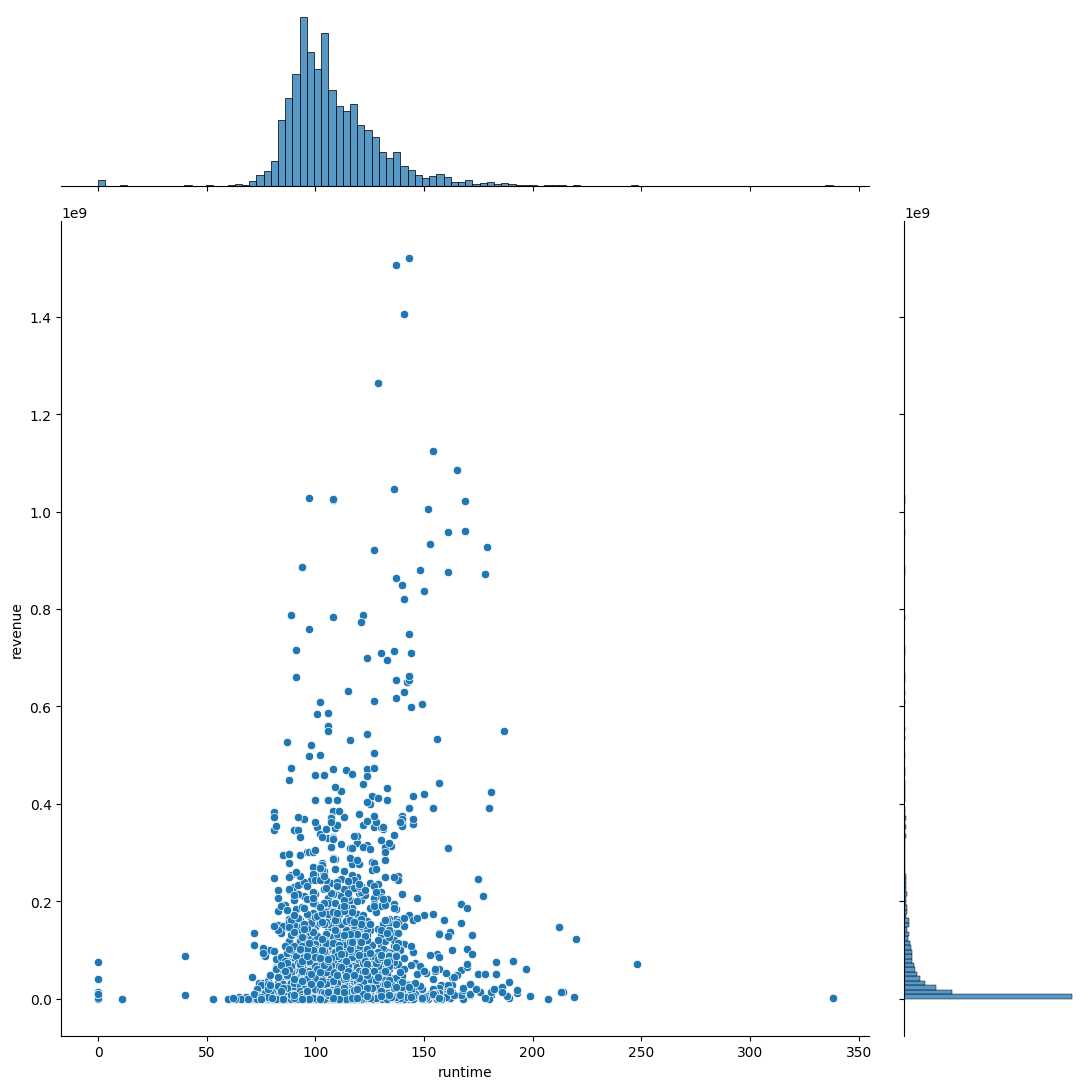

In [219]:
sns.jointplot(x="runtime", y="revenue", data=train, height=11, ratio=4)
plt.show()


<Axes: xlabel='revenue', ylabel='Density'>

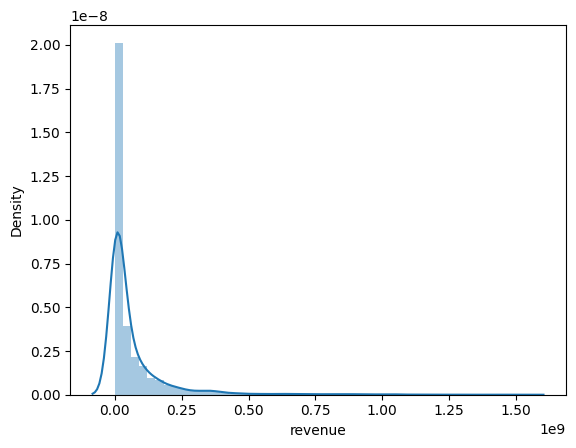

In [220]:
#Distribución

sns.distplot(train.revenue)

In [221]:
train.revenue.describe()

count    3.000000e+03
mean     6.668176e+07
std      1.375149e+08
min      1.000000e+00
25%      2.401550e+06
50%      1.680707e+07
75%      6.877599e+07
max      1.519558e+09
Name: revenue, dtype: float64

La distribución esta muy sesgada, por lo tanto es mejor logarizarlo para sacar valor.

<Axes: xlabel='log_revenue', ylabel='Density'>

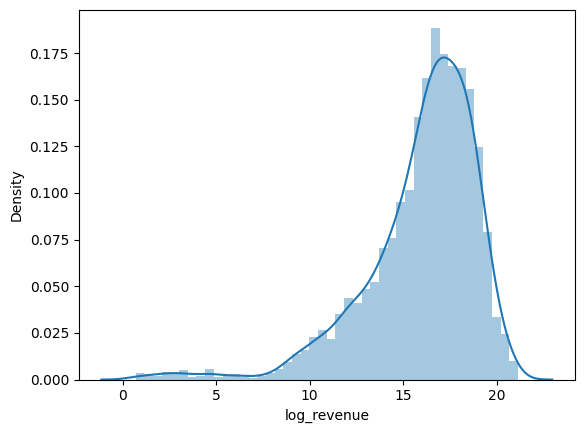

In [222]:
train['log_revenue'] = np.log1p(train['revenue'])
sns.distplot(train['log_revenue'] )

Sacar el día, semana, mes y año del "release_date"

In [223]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Algunas filas tienen 4 cifras en el año y otras 2, por eso (train['release_year'] < 100) 
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

In [224]:
test[['release_month','release_day','release_year']]=test['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Algunas filas tienen 4 cifras en el año y otras 2, por eso (test['release_year'] < 100) 
test.loc[ (test['release_year'] <= 19) & (test['release_year'] < 100), "release_year"] += 2000
test.loc[ (test['release_year'] > 19)  & (test['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(test['release_date']) 
test['release_dayofweek'] = releaseDate.dt.dayofweek
test['release_quarter'] = releaseDate.dt.quarter

In [225]:
releaseDate

0      2007-07-14
1      2058-05-19
2      1997-05-23
3      2010-09-04
4      2005-02-11
          ...    
4393   2001-08-03
4394   2004-08-20
4395   1982-12-08
4396   2015-02-04
4397   2062-09-20
Name: release_date, Length: 4398, dtype: datetime64[ns]

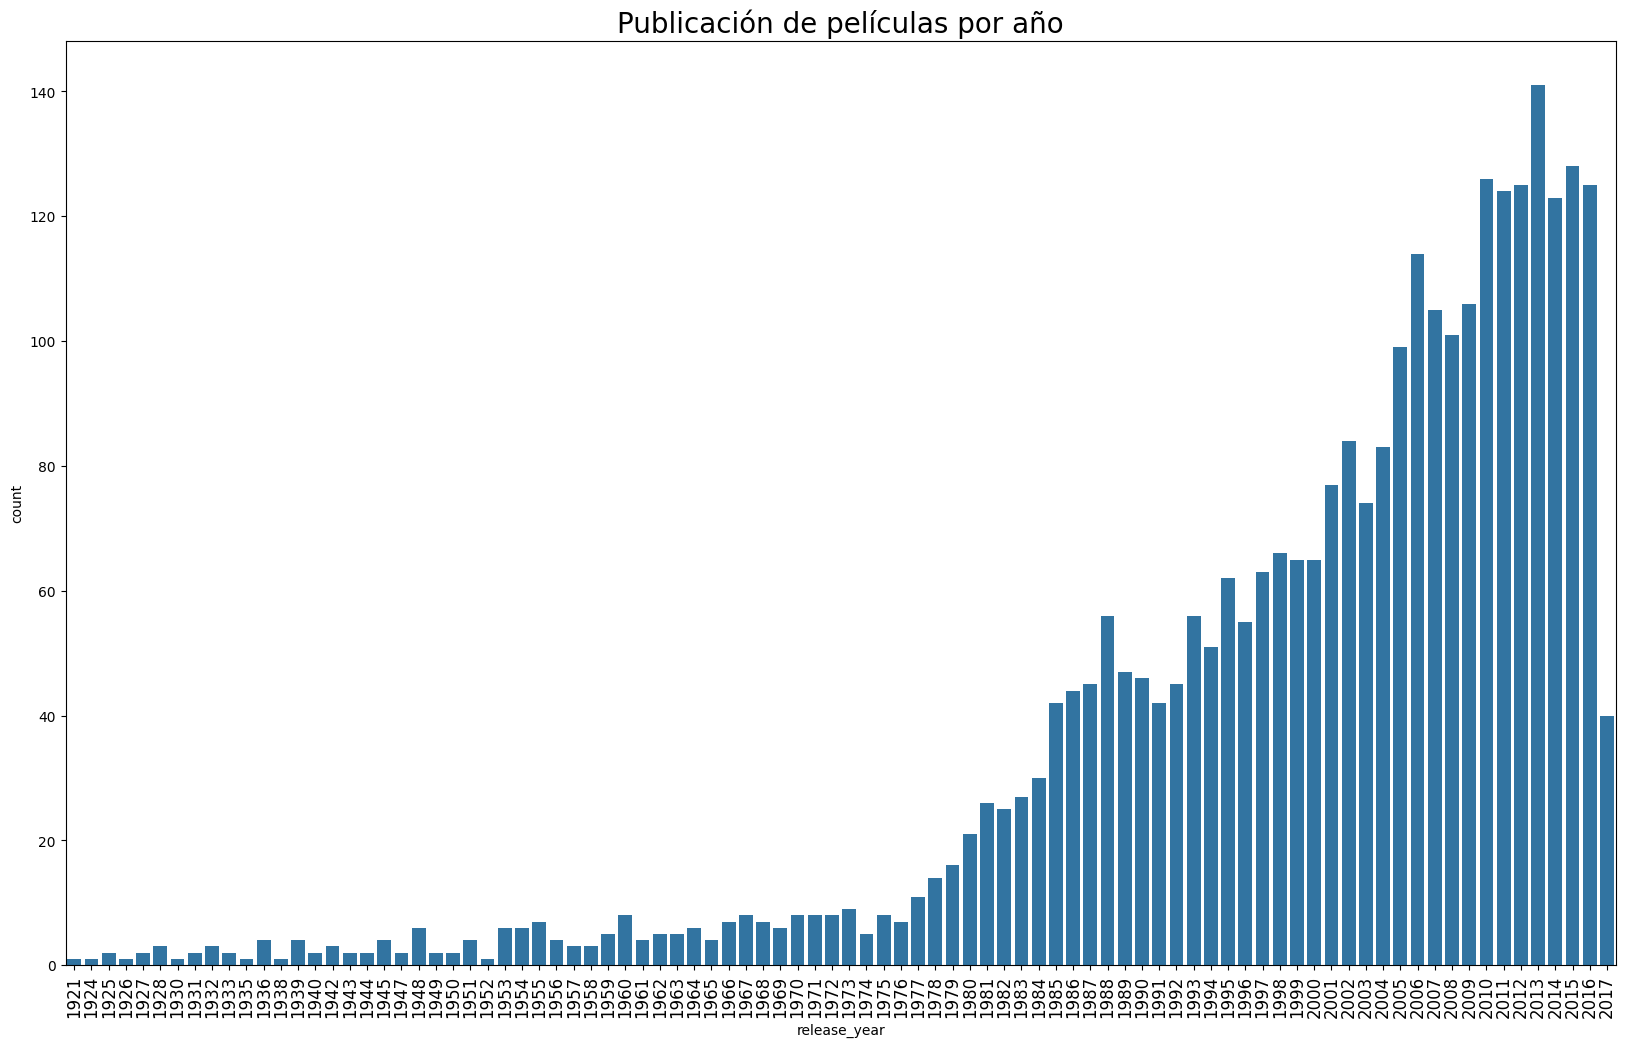

In [226]:
plt.figure(figsize=(20,12))
sns.countplot(x=train['release_year'].sort_values(), order=train['release_year'].sort_values().unique())
plt.title("Publicación de películas por año", fontsize=20)
plt.xticks(fontsize=12, rotation=90)
plt.show()

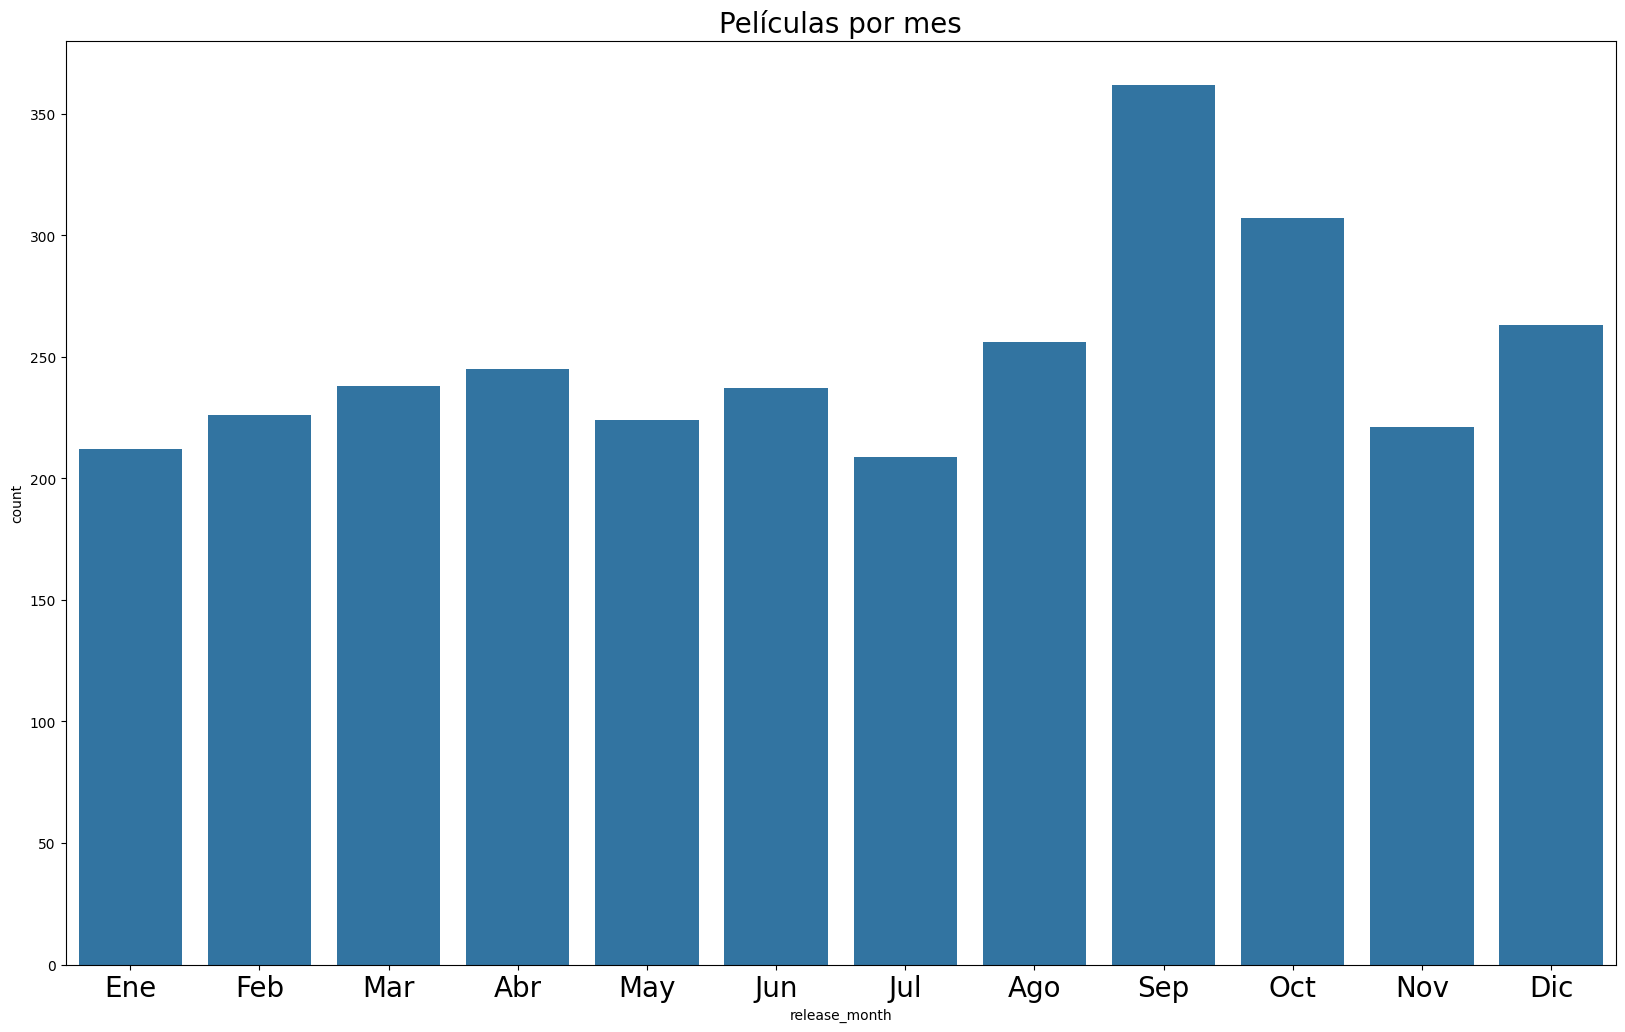

In [227]:
plt.figure(figsize=(20,12))
sns.countplot(x=train['release_month'].sort_values(), order=train['release_month'].sort_values().unique())
plt.title("Películas por mes", fontsize=20)
loc, labels = plt.xticks()
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
plt.xticks(loc, meses, fontsize=20)
plt.show()

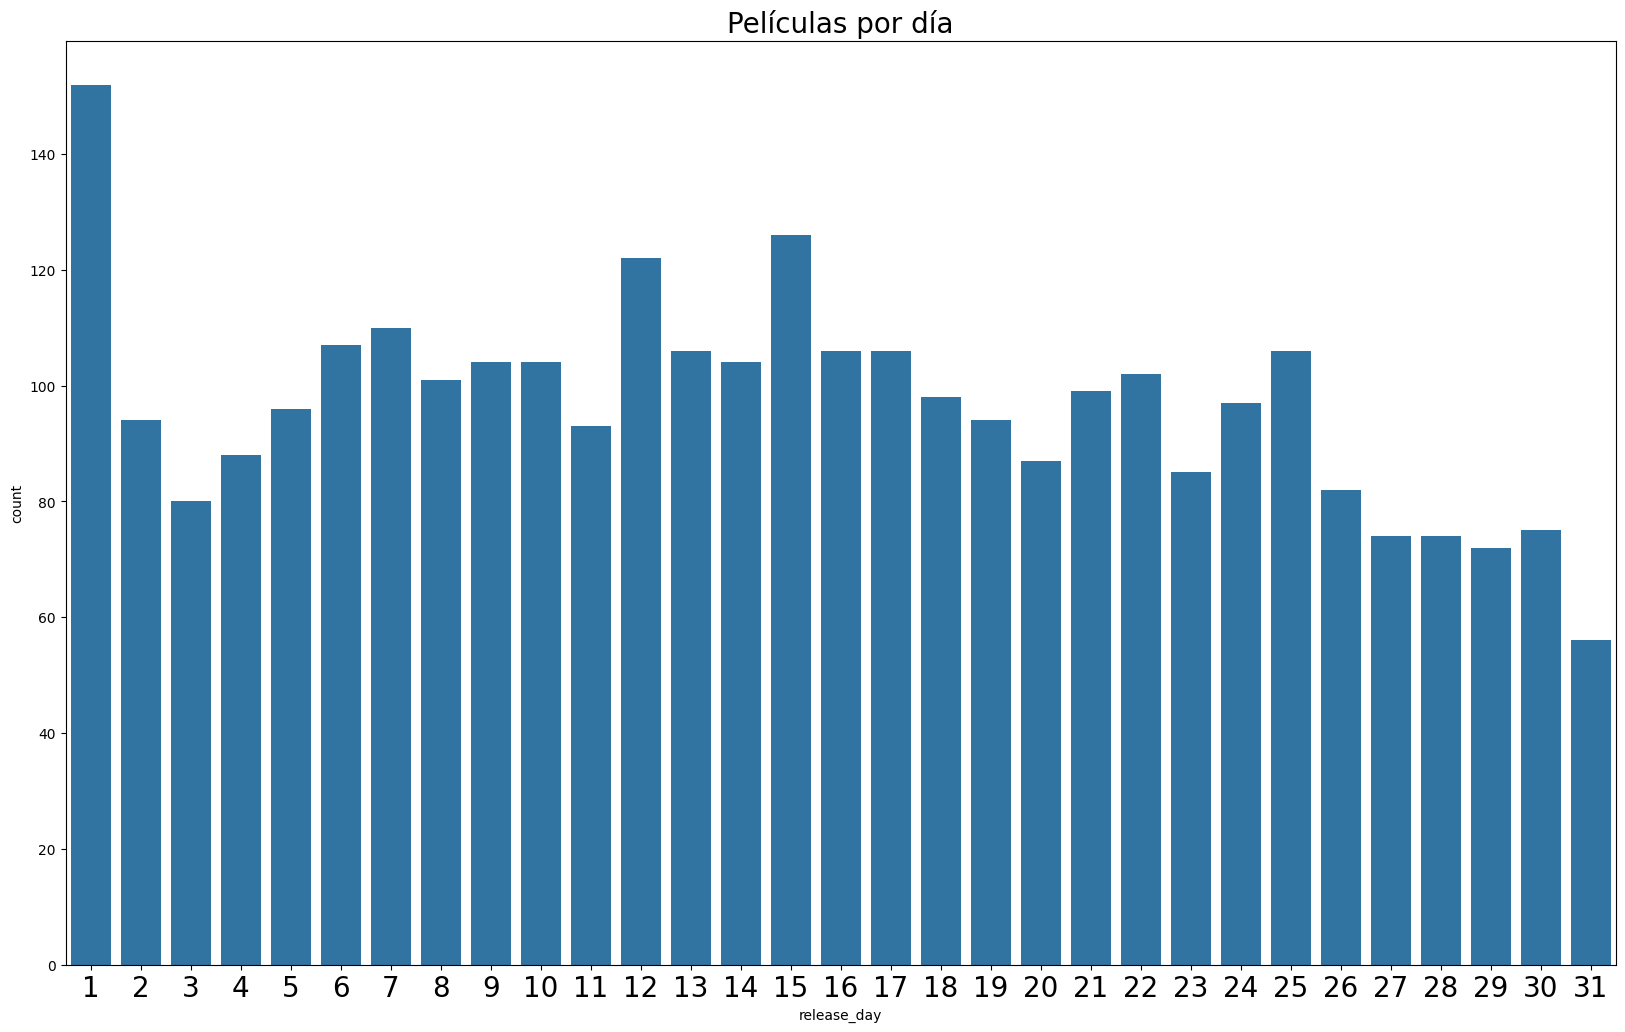

In [228]:

plt.figure(figsize=(20,12))
sns.countplot(x=train['release_day'].sort_values(), order=train['release_day'].sort_values().unique())
plt.title("Películas por día", fontsize=20)
plt.xticks(fontsize=20)
plt.show()

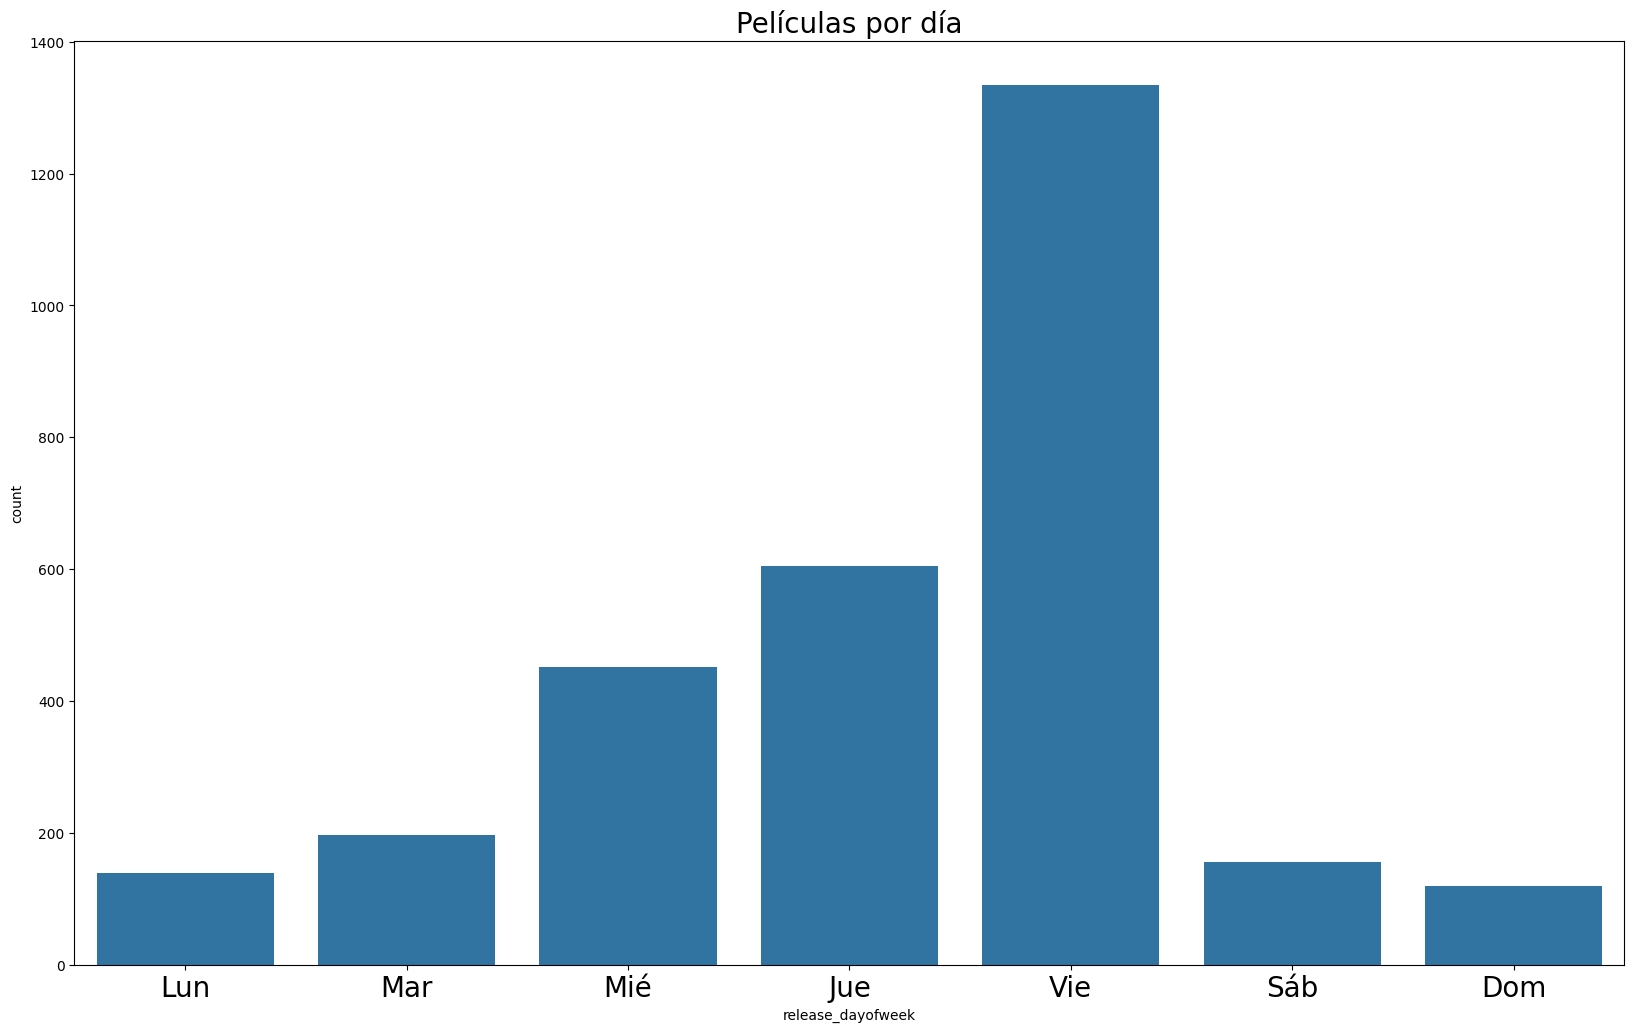

In [229]:
plt.figure(figsize=(20,12))
sns.countplot(x=train['release_dayofweek'].sort_values(), order=train['release_dayofweek'].sort_values().unique())
plt.title("Películas por día", fontsize=20)
loc, labels = plt.xticks()
dias_semana = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
plt.xticks(loc, dias_semana, fontsize=20)
plt.show()

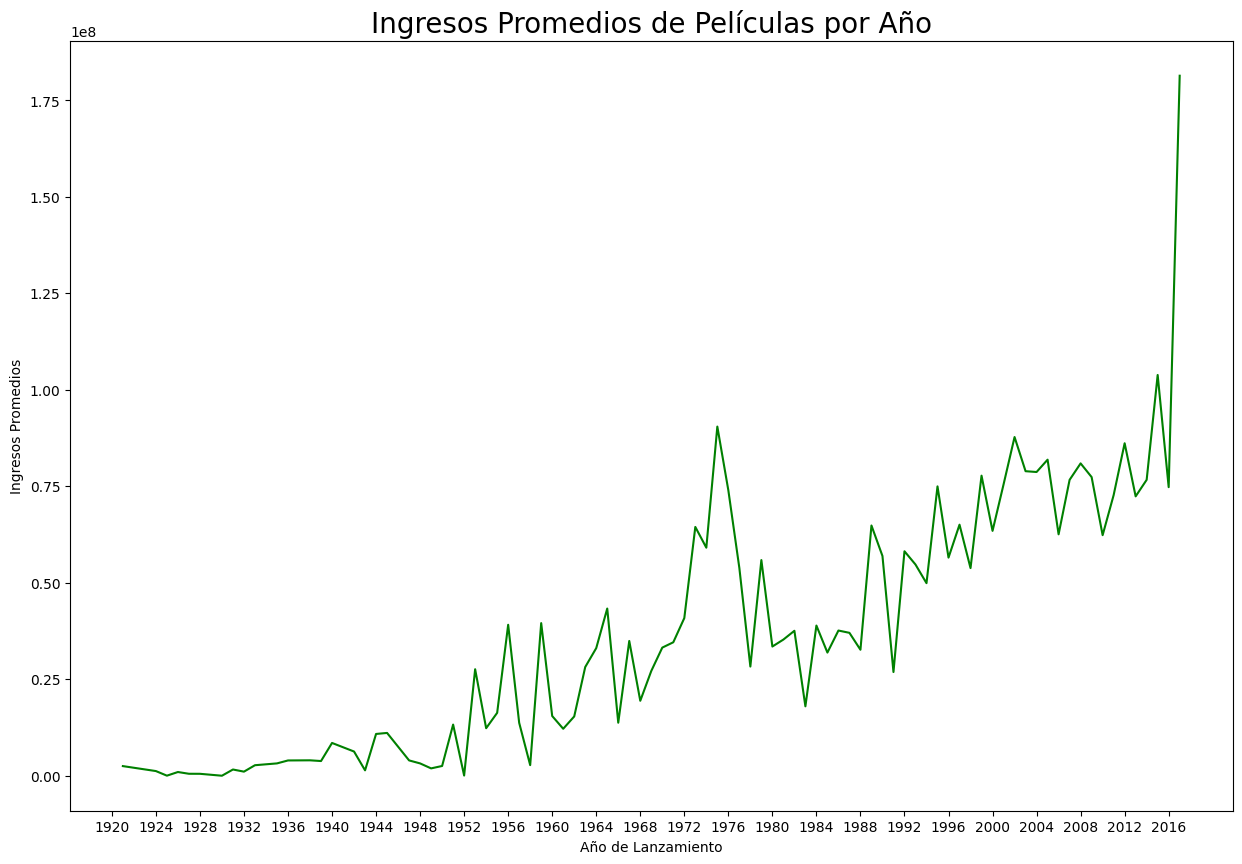

In [230]:
# Calcular el ingreso promedio por año
train['meanRevenueByYear'] = train.groupby("release_year")["revenue"].transform('mean')

# Eliminar duplicados para obtener un solo valor por año
mean_revenue_by_year = train[['release_year', 'meanRevenueByYear']].drop_duplicates()

# Configuración del tamaño de la figura
plt.figure(figsize=(15,10))

# Crear el gráfico de línea con Seaborn
sns.lineplot(data=mean_revenue_by_year, x='release_year', y='meanRevenueByYear', color='g')

# Configurar etiquetas y título
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ingresos Promedios")
plt.title("Ingresos Promedios de Películas por Año", fontsize=20)

# Mostrar el gráfico
plt.show()

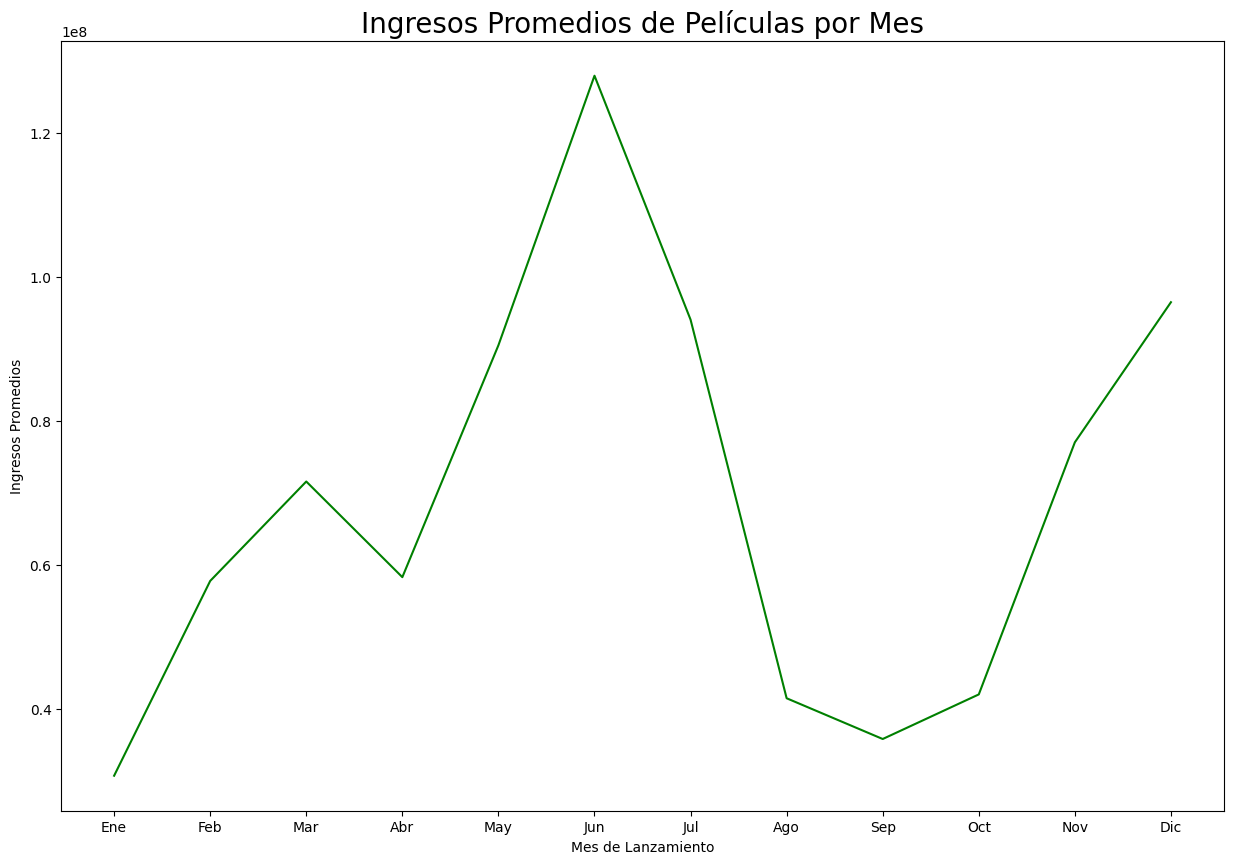

In [231]:
# Calcular el ingreso promedio por mes
train['meanRevenueByMonth'] = train.groupby("release_month")["revenue"].transform('mean')

# Eliminar duplicados para obtener un solo valor por mes
mean_revenue_by_month = train[['release_month', 'meanRevenueByMonth']].drop_duplicates()

# Configuración del tamaño de la figura
plt.figure(figsize=(15,10))

# Crear el gráfico de línea con Seaborn
sns.lineplot(data=mean_revenue_by_month, x='release_month', y='meanRevenueByMonth', color='g')

# Configurar etiquetas y título
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
plt.xticks(ticks=np.arange(1, 13), labels=meses)
plt.xlabel("Mes de Lanzamiento")
plt.ylabel("Ingresos Promedios")
plt.title("Ingresos Promedios de Películas por Mes", fontsize=20)

# Mostrar el gráfico
plt.show()

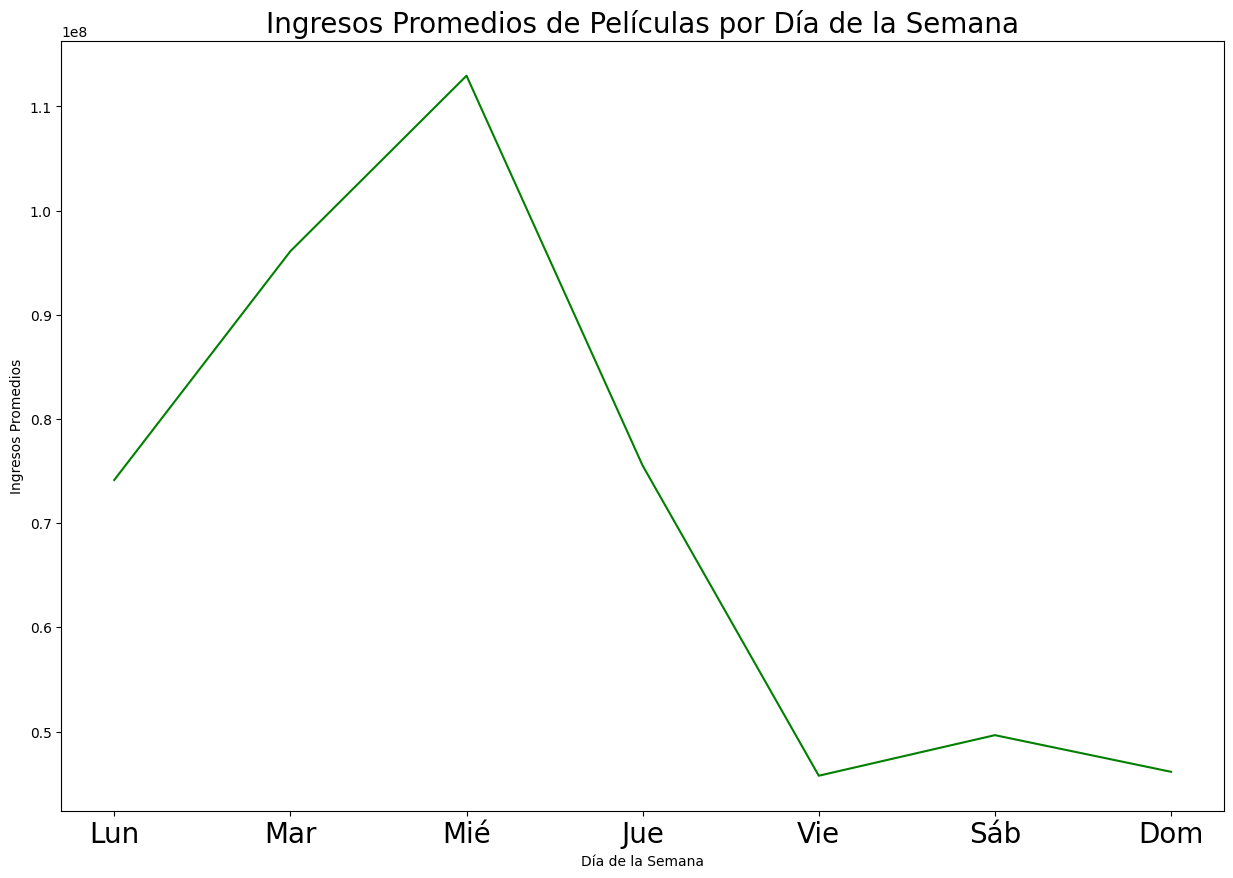

In [232]:

# Calcular el ingreso promedio por día de la semana
train['meanRevenueByDayOfWeek'] = train.groupby("release_dayofweek")["revenue"].transform('mean')

# Eliminar duplicados para obtener un solo valor por día de la semana
mean_revenue_by_dayofweek = train[['release_dayofweek', 'meanRevenueByDayOfWeek']].drop_duplicates()

# Configuración del tamaño de la figura
plt.figure(figsize=(15,10))

# Crear el gráfico de línea con Seaborn
sns.lineplot(data=mean_revenue_by_dayofweek, x='release_dayofweek', y='meanRevenueByDayOfWeek', color='g')

# Configurar etiquetas y título
dias_semana = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
plt.xticks(ticks=np.arange(7), labels=dias_semana, fontsize=20)
plt.xlabel("Día de la Semana")
plt.ylabel("Ingresos Promedios")
plt.title("Ingresos Promedios de Películas por Día de la Semana", fontsize=20)

# Mostrar el gráfico
plt.show()

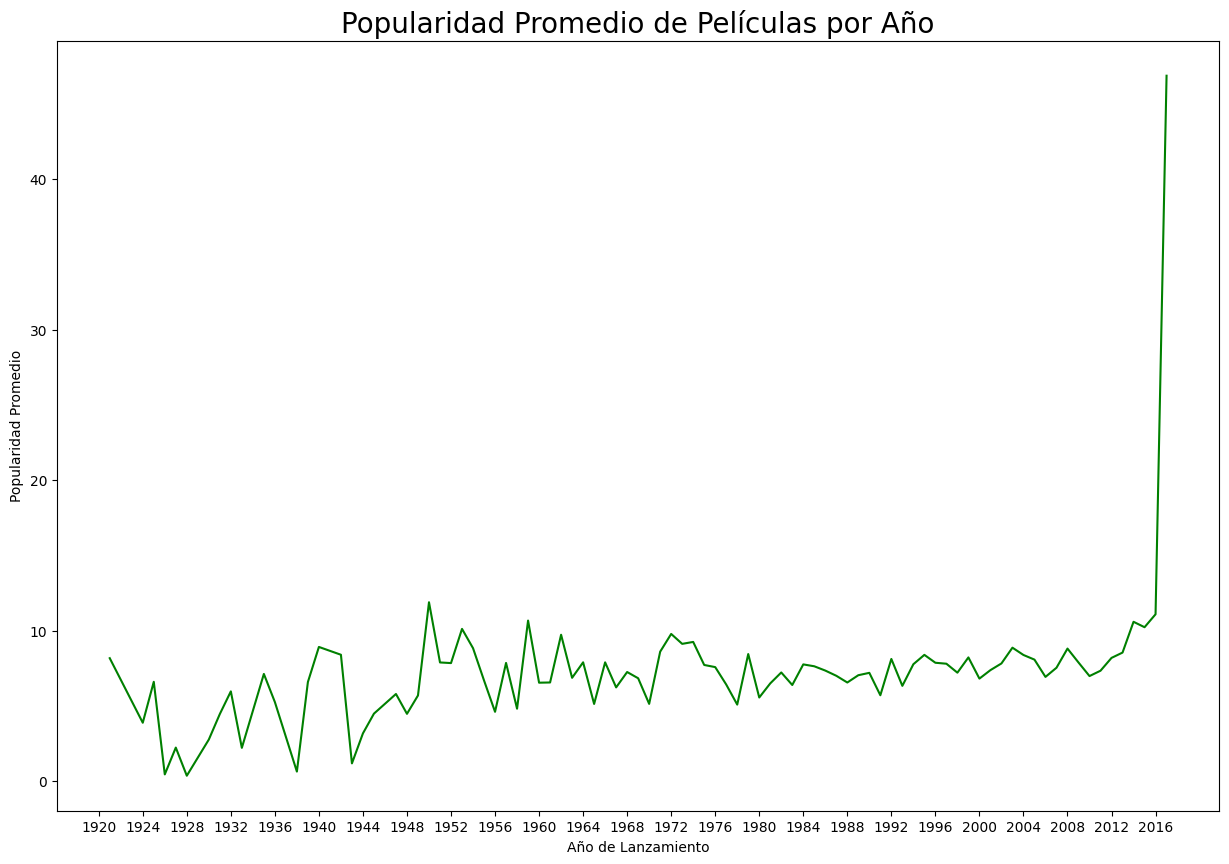

In [233]:
# Calcular la popularidad promedio por año
train['meanPopularityByYear'] = train.groupby("release_year")["popularity"].transform('mean')

# Eliminar duplicados para obtener un solo valor por año
mean_popularity_by_year = train[['release_year', 'meanPopularityByYear']].drop_duplicates()

# Configuración del tamaño de la figura
plt.figure(figsize=(15,10))

# Crear el gráfico de línea con Seaborn
sns.lineplot(data=mean_popularity_by_year, x='release_year', y='meanPopularityByYear', color='g')

# Configurar etiquetas y título
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Popularidad Promedio")
plt.title("Popularidad Promedio de Películas por Año", fontsize=20)

# Mostrar el gráfico
plt.show()

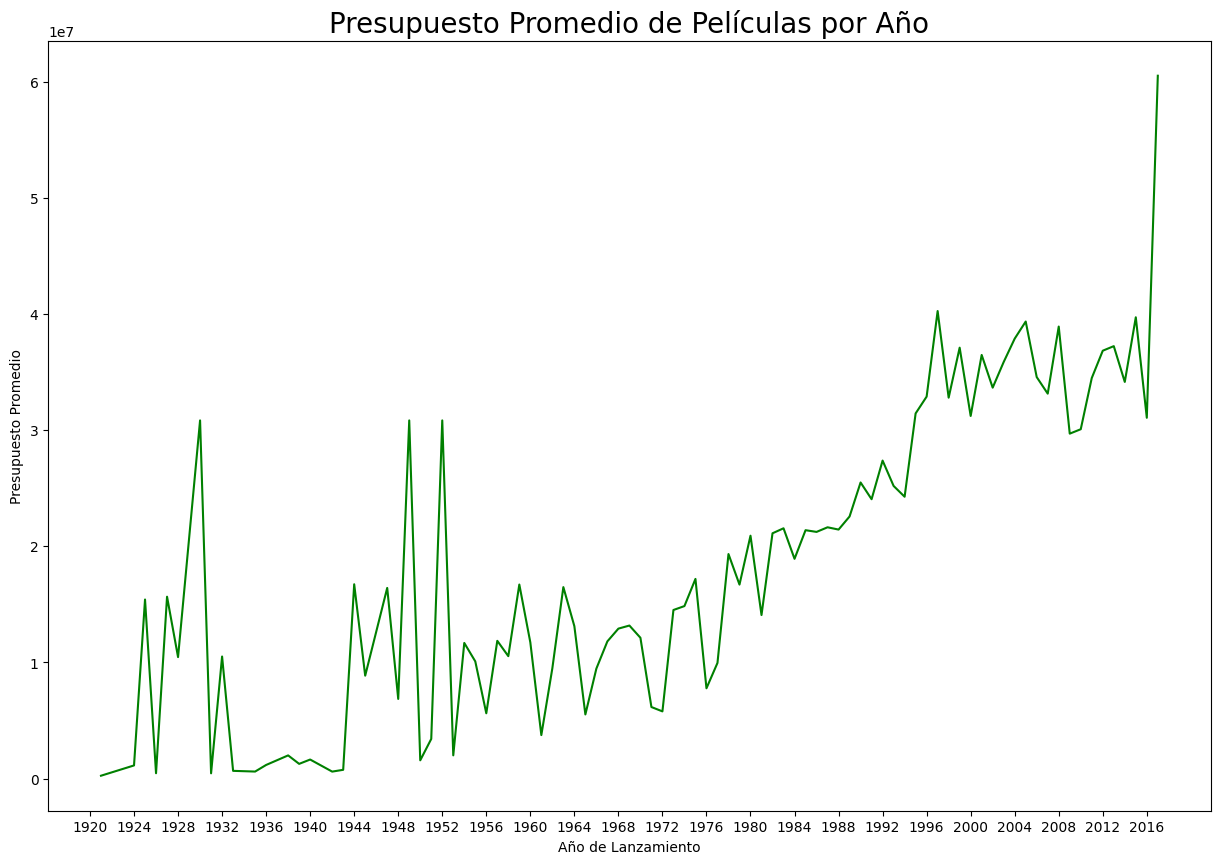

In [234]:
# Calcular el presupuesto promedio por año
train['meanBudgetByYear'] = train.groupby("release_year")["budget"].transform('mean')

# Eliminar duplicados para obtener un solo valor por año
mean_budget_by_year = train[['release_year', 'meanBudgetByYear']].drop_duplicates()

# Configuración del tamaño de la figura
plt.figure(figsize=(15,10))

# Crear el gráfico de línea con Seaborn
sns.lineplot(data=mean_budget_by_year, x='release_year', y='meanBudgetByYear', color='g')

# Configurar etiquetas y título
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Presupuesto Promedio")
plt.title("Presupuesto Promedio de Películas por Año", fontsize=20)

# Mostrar el gráfico
plt.show()


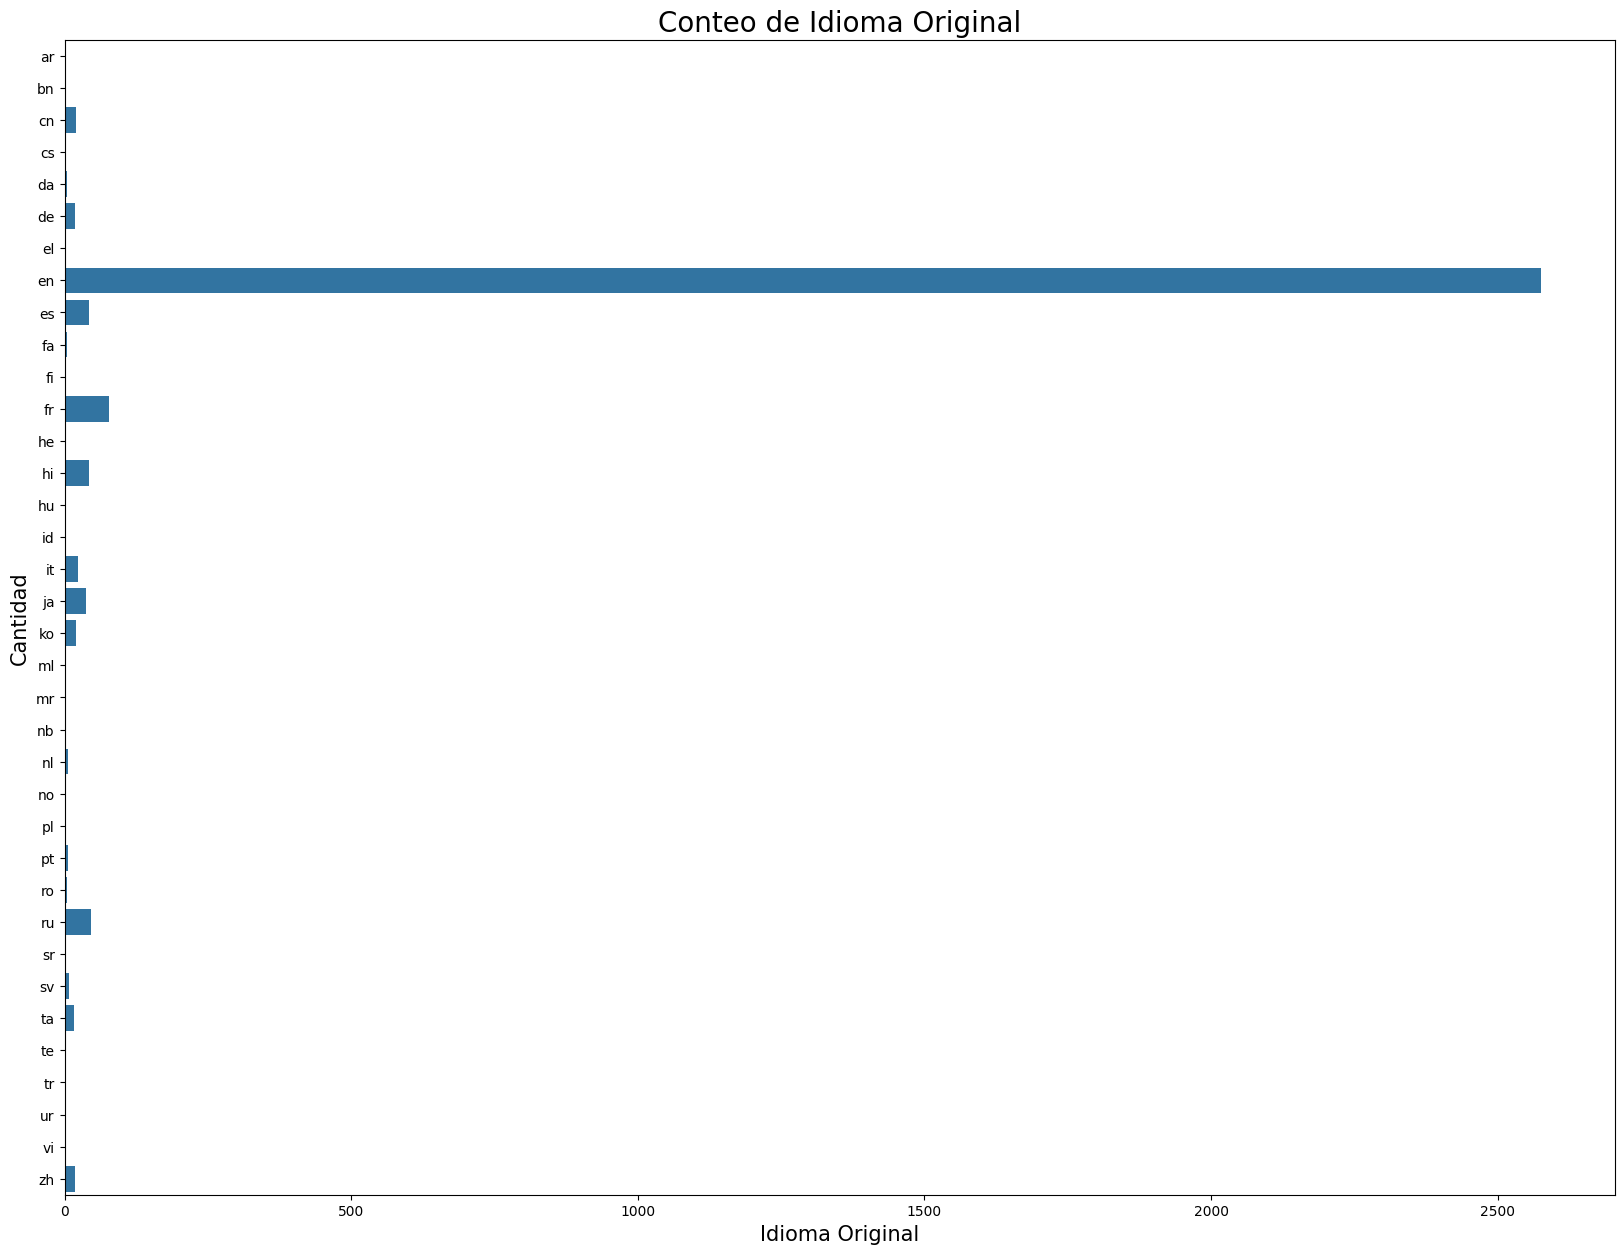

In [235]:
# Configuración del tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear el gráfico de conteo con Seaborn
sns.countplot(train['original_language'].sort_values())

# Configurar título y etiquetas
plt.title("Conteo de Idioma Original", fontsize=20)
plt.xlabel("Idioma Original", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

# Mostrar el gráfico
plt.show()

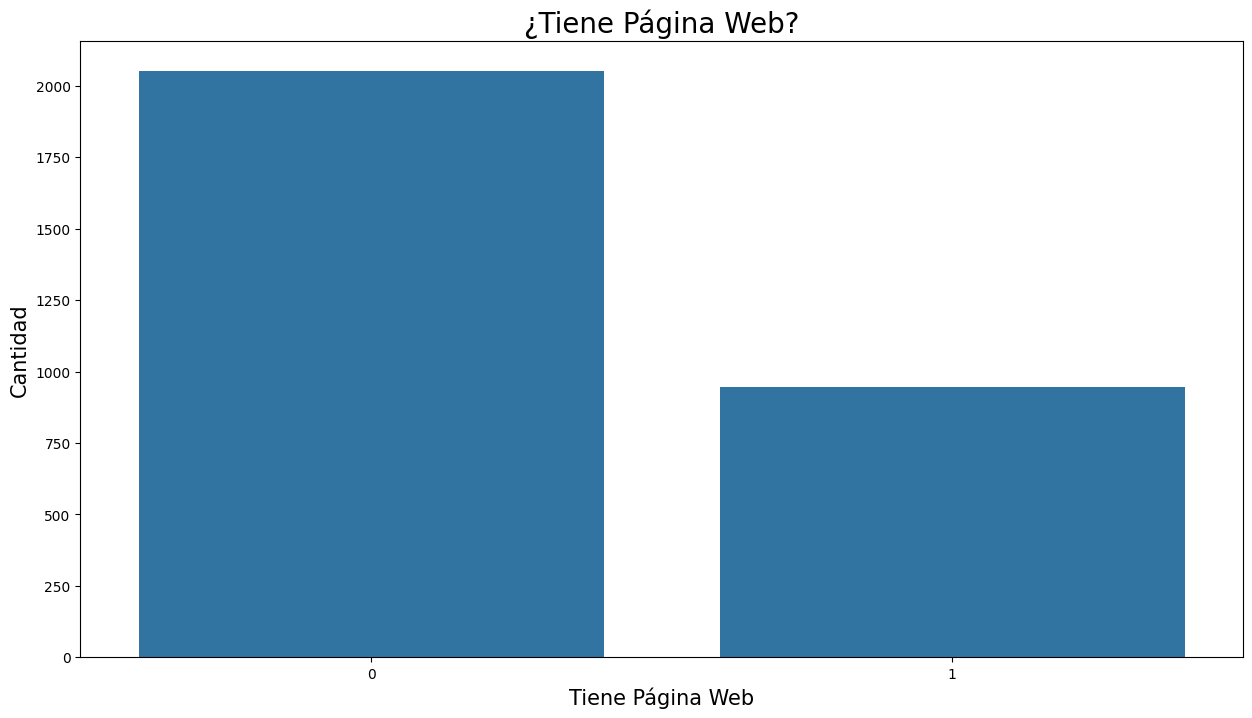

In [236]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']), "has_homepage"] = 0

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 8))

# Crear el gráfico de conteo con Seaborn
sns.countplot(x=train['has_homepage'].sort_values())

# Configurar título y etiquetas en español
plt.title("¿Tiene Página Web?", fontsize=20)
plt.xlabel("Tiene Página Web", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

# Mostrar el gráfico
plt.show()

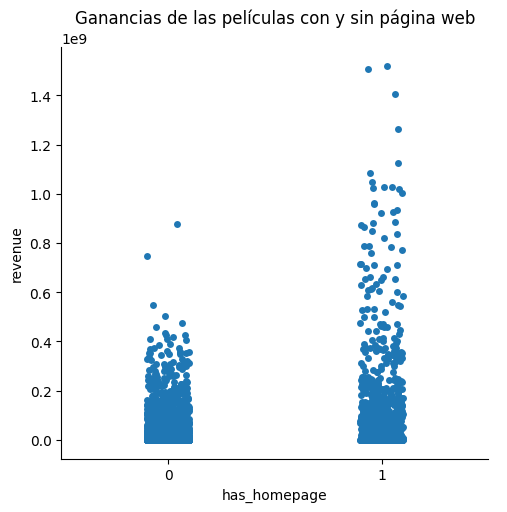

In [237]:
sns.catplot(x="has_homepage", y="revenue", data=train)
plt.title('Ganancias de las películas con y sin página web');

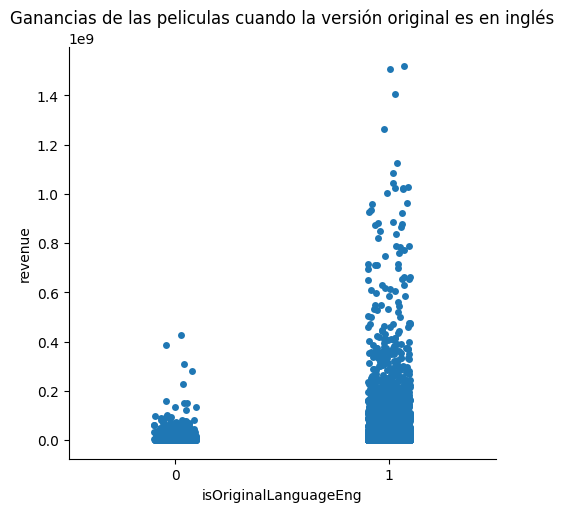

In [238]:
train['isOriginalLanguageEng'] = 0 
train.loc[ train['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
sns.catplot(x="isOriginalLanguageEng", y="revenue", data=train)
plt.title('Ganancias de las peliculas cuando la versión original es en inglés');

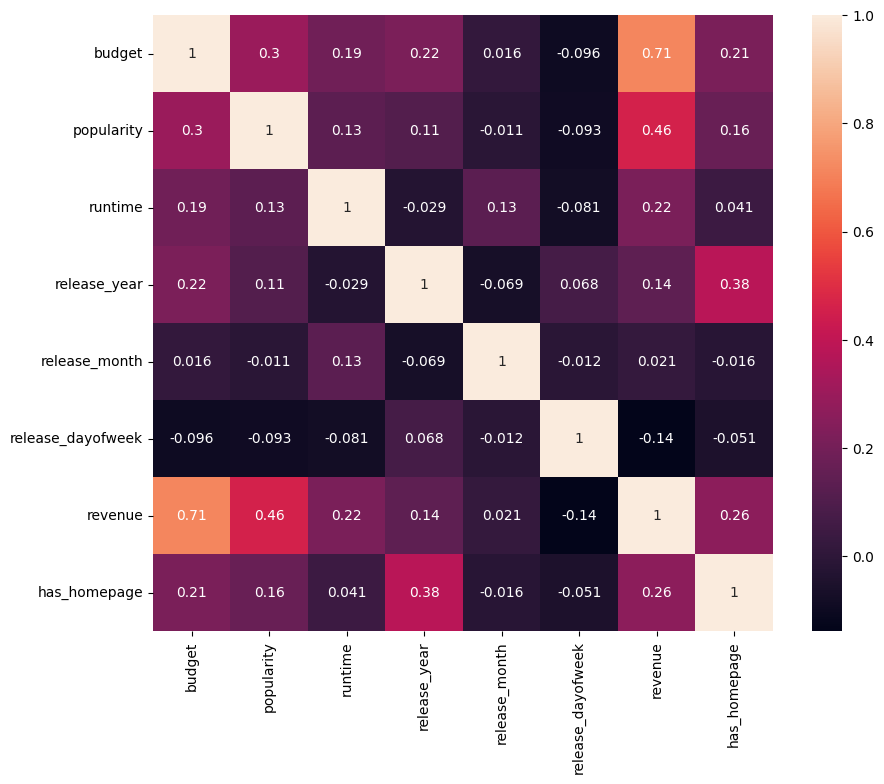

In [239]:
hm= train[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue','has_homepage']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(hm.corr(), annot=True)
plt.show()

El 'Budget' y el 'revenue' están muy correlacionados entre ellos.

## Regresion Lineal solo con el budget

In [240]:
x = train['budget'].values.reshape(-1,1)
y = train['revenue']

In [241]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [242]:
reg = LinearRegression().fit(X_train, y_train)

In [243]:
predictions = reg.predict(X_val)

In [244]:
mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))

In [245]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'Regression Score: {reg.score(X_val, y_val)}')
print(f'Regression Coefficient: {reg.coef_[0]}')

MAE: 58284982.69469142
RMSE: 90421474.11462644
Regression Score: 0.5138312299543567
Regression Coefficient: 2.8961100894377894


El modelo de regresión lineal tiene un coeficiente de 2.8577 para el presupuesto, esto sugiere que por cada unidad adicional de presupuesto, se espera que los ingresos aumenten en promedio 2.85 unidades.

Teniendo en cuenta el MAE y el RMSE esta claro que este modelo tan simple no sirve de nada para nuestra predicción.

### Feature Engineering

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3000 non-null   int64  
 1   belongs_to_collection   604 non-null    object 
 2   budget                  3000 non-null   float64
 3   genres                  3000 non-null   object 
 4   homepage                946 non-null    object 
 5   imdb_id                 3000 non-null   object 
 6   original_language       3000 non-null   object 
 7   original_title          3000 non-null   object 
 8   overview                2992 non-null   object 
 9   popularity              3000 non-null   float64
 10  poster_path             2999 non-null   object 
 11  production_companies    3000 non-null   object 
 12  production_countries    3000 non-null   object 
 13  release_date            3000 non-null   object 
 14  runtime                 2998 non-null   

In [247]:
# Contar las comas y asignar el resultado a nuevas columnas, en las columnas originarias del formato JSON.

train['genres_count'] = train['genres'].str.count(',') + 1
train['spoken_languages_count'] = train['spoken_languages'].str.count(',') + 1
train['cast_count'] = train['cast'].str.count(',') + 1
train['crew_count'] = train['crew'].str.count(',') + 1

test['genres_count'] = test['genres'].str.count(',') + 1
test['spoken_languages_count'] = test['spoken_languages'].str.count(',') + 1
test['cast_count'] = test['cast'].str.count(',') + 1
test['crew_count'] = test['crew'].str.count(',') + 1
test['genres_count']

0       4
1       2
2       2
3       3
4       2
       ..
4393    1
4394    4
4395    1
4396    2
4397    1
Name: genres_count, Length: 4398, dtype: int64

In [248]:
# Converting nominal data to numberical data (label encoding)
train[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = train[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

train['status'] = train['status'].cat.codes
train['original_language'] = train['original_language'].cat.codes
train['production_companies'] = train['production_companies'].cat.codes
train['production_countries'] = train['production_countries'].cat.codes

test[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = test[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

test['status'] = test['status'].cat.codes
test['original_language'] = test['original_language'].cat.codes
test['production_companies'] = test['production_companies'].cat.codes
test['production_countries'] = test['production_countries'].cat.codes

train['production_countries']

0       316
1       316
2       316
3       210
4       236
       ... 
2995    316
2996    111
2997    316
2998    316
2999    316
Name: production_countries, Length: 3000, dtype: int16

In [249]:

y = train['log_revenue']
X = train.drop(['log_revenue', 'revenue'], axis=1)

In [250]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [251]:
print(X_train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew',
       'budget_is_mean', 'budget _is_mean', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter',
       'meanRevenueByYear', 'meanRevenueByMonth', 'meanRevenueByDayOfWeek',
       'meanPopularityByYear', 'meanBudgetByYear', 'has_homepage',
       'isOriginalLanguageEng', 'genres_count', 'spoken_languages_count',
       'cast_count', 'crew_count'],
      dtype='object')


In [252]:
# Las features más interesantes
feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']


X_train_full = X_train[feature_names]

X_valid_full = X_valid[feature_names]

X_train_full.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
642,1988,28,6,0,7,3.900000e+07,7.830087,2,1391,316,1,14,12,116.0
700,1986,19,12,0,7,2.500000e+07,7.409179,3,1812,316,1,17,15,94.0
226,2011,24,2,0,7,5.000000e+07,7.668829,4,1766,316,1,51,70,105.0
1697,1992,31,1,0,7,3.084576e+07,5.860319,3,1988,182,1,12,6,132.0
1010,2015,17,7,0,7,3.500000e+07,17.310647,1,2082,316,1,34,22,125.0


### MACHINE LEARNING

#### Random Forest

In [253]:

rf_model = RandomForestRegressor(
    n_estimators = 20, 
    n_jobs = -1, 
    oob_score = True, 
    random_state = 42)


rf_model.fit(X_train_full, y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True,
                      random_state=42)

In [254]:
# Predicción
y_pred_rf = rf_model.predict(X_valid_full)

In [255]:
# Calcular MAE 
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

print("MAE RF:" , mae_rf)

MAE RF: 1.3296683723211054


In [256]:
# Calcular RMSE
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
print("RMSE RF:" , rmse_rf)

RMSE RF: 1.9283155060205528


In [257]:
# Calcular MAPE
mape_rf = mean_absolute_percentage_error(y_valid, y_pred_rf) * 100
print("MAPE RF:" , mape_rf)


MAPE RF: 11.325437372163828


<Axes: >

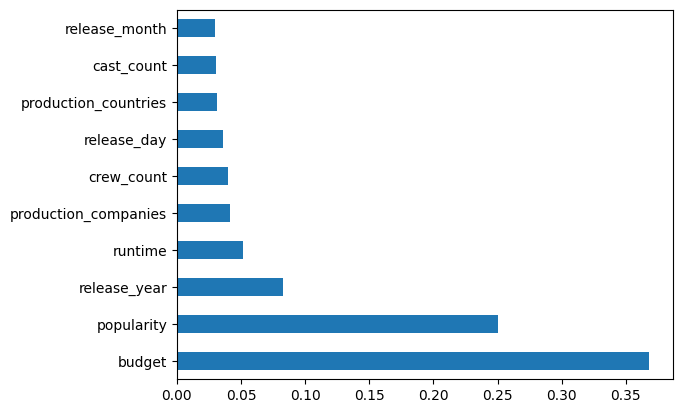

In [258]:
# Calculando la importancia de las features
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

### XGBoost Model

In [259]:

xgb_model = XGBRegressor(
        n_estimators = 50000, 
        learning_rate = 0.001,
        max_depth = 6, 
        subsample = 0.3, 
        colsample_bytree = 0.2
        )


xgb_model.fit(X_train_full, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [260]:

y_pred_xgb = xgb_model.predict(X_valid_full)

In [261]:
# Calcular MAE 
mae_xgb = mean_absolute_error(y_pred_xgb, y_valid)

print("MAE XGBOOST:" , mae_xgb)

MAE XGBOOST: 1.3850716952357784


In [262]:
# Calcular RMSE
rmse_xgb = mean_squared_error(y_valid, y_pred_xgb, squared=False)
print("RMSE XGBOOST:" , rmse_xgb)

RMSE XGBOOST: 1.9769418120117486


In [263]:
# Calcular MAPE
mape_xgb = mean_absolute_percentage_error(y_valid, y_pred_xgb) * 100
print("MAPE XGBOOST:" , mape_xgb)

MAPE XGBOOST: 11.665613573213136


<Axes: >

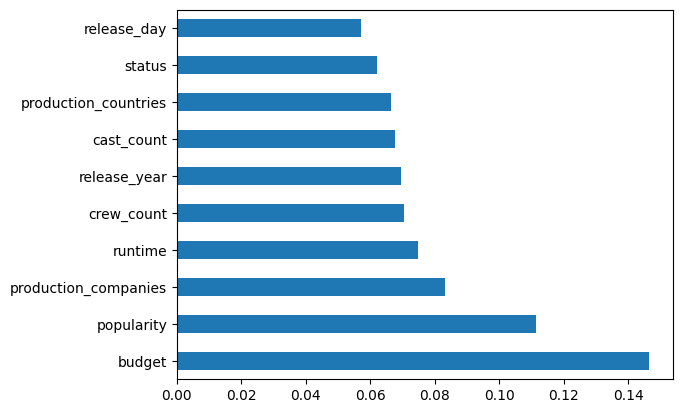

In [264]:
# Calcular la importancia de las features
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

Visualización de los valores finales del RANDOM FOREST

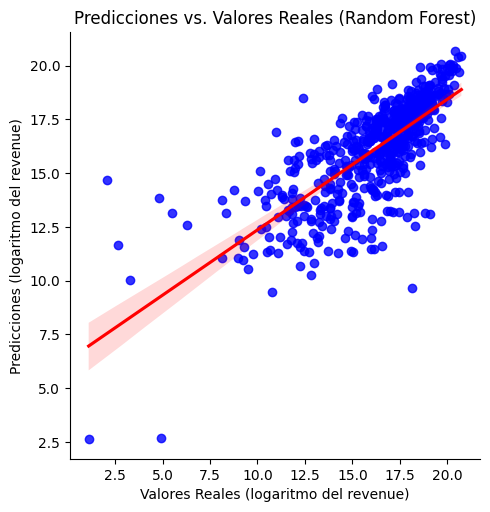

In [265]:

valores_reales = y_valid.values 

predicciones_rf = y_pred_rf  

data_rf = pd.DataFrame({"Valores Reales": valores_reales, "Predicciones RF": predicciones_rf})

sns.lmplot(x="Valores Reales", y="Predicciones RF", data=data_rf, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title("Predicciones vs. Valores Reales (Random Forest)")
plt.xlabel("Valores Reales (logaritmo del revenue)")
plt.ylabel("Predicciones (logaritmo del revenue)")

plt.show()